In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import atan2, cos, sin, sqrt, pi
import math
import imutils

In [356]:
def getCentermass(rawimg):
    mass_y,mass_x = np.where(rawimg!=0)
    return int(round(np.mean(mass_x))),int(round(np.mean(mass_y)))
def drawAxis(img, p_, q_, colour, scale):
    p = list(p_)
    q = list(q_)
    angle = atan2(p[1] - q[1], p[0] - q[0]) # angle in radians
    hypotenuse = sqrt((p[1] - q[1]) * (p[1] - q[1]) + (p[0] - q[0]) * (p[0] - q[0]))
    # Here we lengthen the arrow by a factor of scale
    q[0] = p[0] - scale * hypotenuse * cos(angle)
    q[1] = p[1] - scale * hypotenuse * sin(angle)
    cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv2.LINE_AA)
    # create the arrow hooks
    p[0] = q[0] + 9 * cos(angle + pi / 4)
    p[1] = q[1] + 9 * sin(angle + pi / 4)
    cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv2.LINE_AA)
    p[0] = q[0] + 9 * cos(angle - pi / 4)
    p[1] = q[1] + 9 * sin(angle - pi / 4)
    cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv2.LINE_AA)
def getOrientation(img):
    mass_y,mass_x = np.where(img!=0)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    sz = len(mass_x)
    data_pts = np.empty((sz,2),dtype=np.float64)
    for i in range(sz):
        data_pts[i] = [mass_x[i],mass_y[i]]
    mean = np.empty((0))
    mean, eigenvectors, eigenvalues = cv2.PCACompute2(data_pts,mean)
    cntr = (int(round(mean[0,0])),int(round(mean[0,1])))
    # draw center of mass
    #cv2.circle(img, cntr, 3, (255, 0, 255), 2)
    #p1 = (cntr[0] + 0.005 * eigenvectors[0,0] * eigenvalues[0,0], cntr[1] + 0.005 * eigenvectors[0,1] * eigenvalues[0,0])
    #p2 = (cntr[0] - 0.005 * eigenvectors[1,0] * eigenvalues[1,0], cntr[1] - 0.005 * eigenvectors[1,1] * eigenvalues[1,0])
    #drawAxis(img, cntr, p1, (0, 255, 0), 1)
    #drawAxis(img, cntr, p2, (255, 0, 0), 5)
    angle = atan2(eigenvectors[0,1], eigenvectors[0,0])*180/math.pi # orientation in radians
    # print('ei',eigenvectors)
    return angle,cntr
def getAvgWH(img):
    mass_y,mass_x = np.where(img!=0)
    tot_mass = np.sum((img!=0)*1)
    max_W = np.max(mass_x)-np.min(mass_x)
    max_H = np.max(mass_y)-np.min(mass_y)
    #return tot_mass/max_H,tot_mass/max_W
    #print('1', tot_mass/max_H,tot_mass/max_W)
    temp = (img!=0)*1
    avg_row = np.sum(temp,0)
    avgH = np.median(avg_row[avg_row!=0])
    avg_col = np.sum(temp,1)
    avgW = np.median(avg_col[avg_col!=0])
    #print('2',avgW,avgH)
    #return avgW,avgH
    return max_W,max_H
def getRatio(image0,image1):
    avgWH0 = getAvgWH(image0)
    avgWH1 = getAvgWH(image1)
    return np.divide(avgWH1,avgWH0)
def rotate(img,angle,center):
    (h, w) = img.shape[:2]
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return (cv2.warpAffine(img, M, (w, h)) > 200).astype('uint8')*255
def SFVMatchTemplate(fn0,fn1):
    rawimg0 = cv2.imread(fn0,0)
    rawimg1 = cv2.imread(fn1,0)
    angle0,centermass0 = getOrientation(rawimg0)
    angle1,centermass1 = getOrientation(rawimg1)
    d_angle = angle1 - angle0
    rotated = rotate(rawimg1,d_angle,centermass1)
    _,centermass1 = getOrientation(rotated)
    scale = getRatio(rawimg0,rotated)
    newsize = np.multiply(rawimg0.shape[:2][::-1],scale).astype('int32')
    scaled_temp = cv2.resize(rawimg0,(newsize[0],newsize[1]),interpolation = cv2.INTER_NEAREST)
    centermass0 = getCentermass(scaled_temp)
    contours, hierarchy = cv2.findContours(scaled_temp, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    offs = np.asarray(centermass1)-np.asarray(centermass0)
    image0 = cv2.drawContours(scaled_temp, contours, 0, (125,125, 125), 2)
    main_cont = contours[0]
    main_cont += offs
    res = cv2.drawContours(rotated, [main_cont], 0, (125,125, 125), 2)
    return res

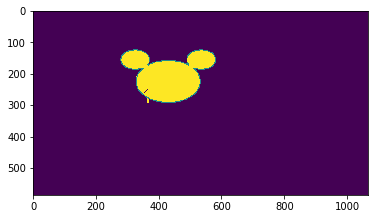

In [358]:
result  = SFVMatchTemplate('Binary_coins.png','1.png')
plt.imshow(result)
plt.show()

In [301]:
313*0.968
print(383*0.968
490*0.4436

370.74399999999997


217.364